In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
#dadta preprocessing
#checking null value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#handle duplicates
df.duplicated().sum()

0

In [7]:
#check target variable
r1 = df['Outcome'].value_counts()
r1

0    500
1    268
Name: Outcome, dtype: int64

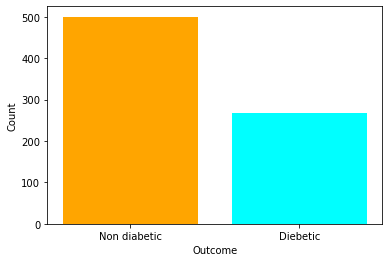

In [9]:
plt.bar(r1.index,r1,color=['Orange','cyan'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(r1.index,['Non diabetic','Diebetic'])
plt.show()

In [10]:
#check the data type
df.dtypes


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

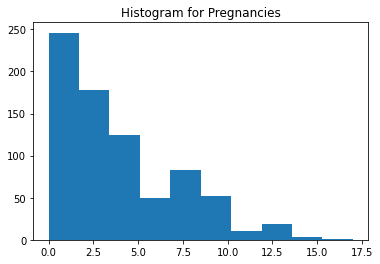

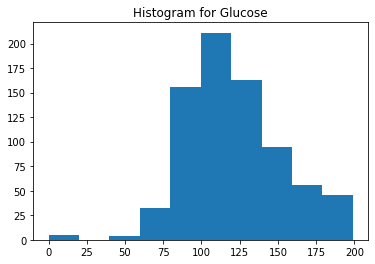

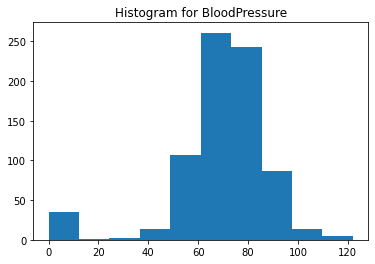

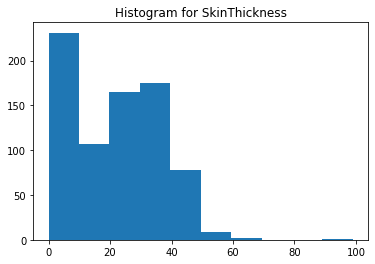

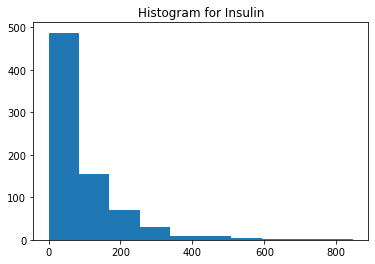

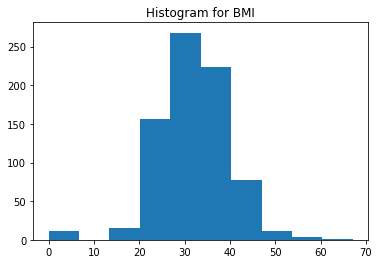

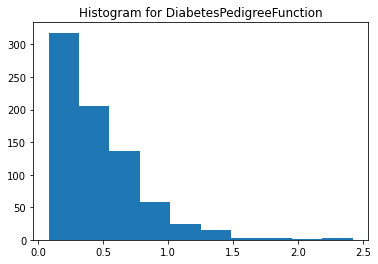

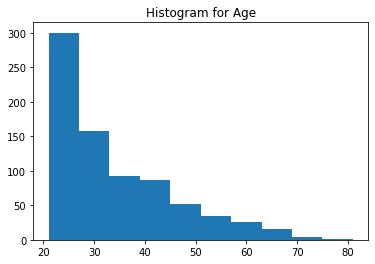

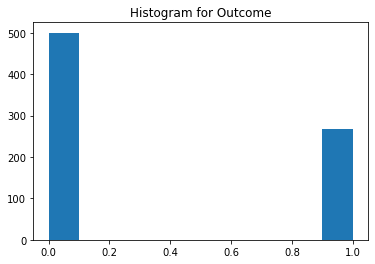

In [12]:
#EDA - exploratory dat analysis
for i in df.columns:
    plt.hist(x=df[i])
    plt.title(f'Histogram for {i}')
    plt.show()
    

In [13]:
#select the dependent and independent feature
x = df.drop('Outcome',axis = 1)
y = df['Outcome']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 8)
(768,)


In [14]:
#split data into train and test data
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [16]:
#svm model
from sklearn.svm import SVC

In [17]:
svc_m1 = SVC(kernel = 'linear',C=1)
svc_m1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [18]:
print('Train Score',svc_m1.score(x_train,y_train))
print('Test Score',svc_m1.score(x_test,y_test))

Train Score 0.78125
Test Score 0.7291666666666666


In [22]:
ypred_svc_m1 = svc_m1.predict(x_test)
print(ypred_svc_m1)

[0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 1 0 0 0]


In [19]:
#generate confusion matrix,classification matrix
from sklearn.metrics import confusion_matrix,classification_report

In [27]:
cm = confusion_matrix(y_test,ypred_svc_m1)
print(cm)

[[96 27]
 [25 44]]


In [28]:
cls_rep = classification_report(y_test,ypred_svc_m1)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       123
           1       0.62      0.64      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



In [29]:
x_test.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50


In [30]:
x_test['Outcome_pred' ] = ypred_svc_m1
x_test.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_pred
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,1
